# week7 내용

In [1]:
import requests

In [6]:
import csv

In [2]:
import lxml.html

In [4]:
url = 'http://news.naver.com/main/search/search.nhn?query=%BA%F2%B5%A5%C0%CC%C5%CD&ie=MS949&x=0&y=0&page={}'

In [7]:
with open('news.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    for i in range(1, 21):
        res = requests.get(url.format(i))  # 기사 목록
        element = lxml.html.fromstring(res.text)
        for news_link in element.xpath('.//a[@class="go_naver"]'):
            try:
                res = requests.get(news_link.attrib['href'])   # 네이버 뉴스 링크
                news = lxml.html.fromstring(res.text)
                body = news.xpath('.//div[@id="articleBodyContents"]')[0]
                writer.writerow([body.text_content()])
            except:
                continue

# 스크래핑 뉴스 읽어오기

In [8]:
news = []
with open('news.csv', encoding = 'utf8', newline="\r\n") as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

# 형태소 분석기

In [9]:
from konlpy.tag import Twitter

In [10]:
tagger = Twitter()

# Term-Document matrix 만들기

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50) # 명사에 대해 count 해주는 작업

In [25]:
tdf = cv.fit_transform(news) # term-document matrix로 변환해주는 작업

In [26]:
tdf # 213개의 기사의 50개의 단어 중 4610 개의 숫자가 들어있다는 의미

<213x50 sparse matrix of type '<class 'numpy.int64'>'
	with 4610 stored elements in Compressed Sparse Row format>

In [30]:
tdf.todense() # file format 변경(가로는 하나의 문서를 의미, 세로는 단어를 말함)

matrix([[ 1,  0,  4, ...,  1,  0,  0],
        [ 2,  1,  3, ...,  3,  0,  0],
        [ 3,  4,  3, ...,  2,  0,  0],
        ..., 
        [ 0,  0,  0, ...,  1,  0,  0],
        [ 0,  0, 37, ...,  1,  0,  0],
        [ 0,  0,  8, ...,  0,  0,  0]], dtype=int64)

# 단어목록

In [27]:
words = cv.get_feature_names()

In [28]:
words

['개',
 '거래',
 '것',
 '결과',
 '고객',
 '기반',
 '기술',
 '기업',
 '기자',
 '날',
 '년',
 '뉴스',
 '뉴시스',
 '단계',
 '대상자',
 '대해',
 '데이터',
 '등',
 '만',
 '매우',
 '멜론',
 '명',
 '및',
 '복지',
 '분석',
 '빅데이터',
 '산업',
 '상품',
 '서비스',
 '서울',
 '세상',
 '수',
 '수준',
 '시',
 '시장',
 '심리',
 '억원',
 '월',
 '이',
 '일',
 '전',
 '정보',
 '종목',
 '지수',
 '지원',
 '최근',
 '통해',
 '투자',
 '티켓',
 '팁코']

# 한글자 짜리 단어 빼기

In [32]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [33]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [35]:
tdf = cv.fit_transform(news)

In [36]:
words = cv.get_feature_names()

In [37]:
words

['개인',
 '거래',
 '결과',
 '고객',
 '관련',
 '긍정',
 '기반',
 '기술',
 '기업',
 '기자',
 '뉴스',
 '뉴시스',
 '단계',
 '대상자',
 '대해',
 '데이터',
 '레벨',
 '매우',
 '멜론',
 '모바일',
 '복지',
 '분기',
 '분석',
 '빅데이터',
 '사각',
 '사업',
 '산업',
 '상품',
 '서비스',
 '서울',
 '세상',
 '쇼핑',
 '수준',
 '시장',
 '실적',
 '심리',
 '약간',
 '억원',
 '오전',
 '정보',
 '종목',
 '지수',
 '지원',
 '최근',
 '코스콤',
 '코스피',
 '통해',
 '투자',
 '티켓',
 '팁코']

# 단어별 출현 빈도

In [38]:
import numpy

In [39]:
count_mat = tdf.sum(axis=0) # 열별로 단어별 출현 빈도 합계 구함(axis = 1 , 각 문서별 명사의 사용 개수)

In [40]:
count_mat

matrix([[131, 187, 165, 209, 127, 132, 143, 143, 247, 241, 210, 340, 812,
         154, 155, 337, 120, 193, 209, 124, 242, 125, 297, 757, 120, 136,
         154, 163, 302, 172, 150, 126, 191, 504, 125, 182, 124, 138, 136,
         366, 374, 188, 176, 137, 125, 133, 177, 213, 147, 164]], dtype=int64)

In [43]:
count = numpy.squeeze(numpy.asarray(count_mat)) # 대괄호가 하나로 줄어듬. 좀더 데이터 핸들링을 쉽게 하기 위해 리스트 형태로 해줌

In [44]:
count

array([131, 187, 165, 209, 127, 132, 143, 143, 247, 241, 210, 340, 812,
       154, 155, 337, 120, 193, 209, 124, 242, 125, 297, 757, 120, 136,
       154, 163, 302, 172, 150, 126, 191, 504, 125, 182, 124, 138, 136,
       366, 374, 188, 176, 137, 125, 133, 177, 213, 147, 164], dtype=int64)

In [45]:
word_count = list(zip(words, count)) # zip : 두개의 각 리스트별 원소의 짝을 지어줌

In [46]:
word_count

[('개인', 131),
 ('거래', 187),
 ('결과', 165),
 ('고객', 209),
 ('관련', 127),
 ('긍정', 132),
 ('기반', 143),
 ('기술', 143),
 ('기업', 247),
 ('기자', 241),
 ('뉴스', 210),
 ('뉴시스', 340),
 ('단계', 812),
 ('대상자', 154),
 ('대해', 155),
 ('데이터', 337),
 ('레벨', 120),
 ('매우', 193),
 ('멜론', 209),
 ('모바일', 124),
 ('복지', 242),
 ('분기', 125),
 ('분석', 297),
 ('빅데이터', 757),
 ('사각', 120),
 ('사업', 136),
 ('산업', 154),
 ('상품', 163),
 ('서비스', 302),
 ('서울', 172),
 ('세상', 150),
 ('쇼핑', 126),
 ('수준', 191),
 ('시장', 504),
 ('실적', 125),
 ('심리', 182),
 ('약간', 124),
 ('억원', 138),
 ('오전', 136),
 ('정보', 366),
 ('종목', 374),
 ('지수', 188),
 ('지원', 176),
 ('최근', 137),
 ('코스콤', 125),
 ('코스피', 133),
 ('통해', 177),
 ('투자', 213),
 ('티켓', 147),
 ('팁코', 164)]

# 빈도수 정렬

In [47]:
import operator

In [48]:
sorted(word_count, key=operator.itemgetter(1), reverse=True) # word_count를 1번째(빈도수)를 기준으로 내림차순 정렬을 하라

[('단계', 812),
 ('빅데이터', 757),
 ('시장', 504),
 ('종목', 374),
 ('정보', 366),
 ('뉴시스', 340),
 ('데이터', 337),
 ('서비스', 302),
 ('분석', 297),
 ('기업', 247),
 ('복지', 242),
 ('기자', 241),
 ('투자', 213),
 ('뉴스', 210),
 ('고객', 209),
 ('멜론', 209),
 ('매우', 193),
 ('수준', 191),
 ('지수', 188),
 ('거래', 187),
 ('심리', 182),
 ('통해', 177),
 ('지원', 176),
 ('서울', 172),
 ('결과', 165),
 ('팁코', 164),
 ('상품', 163),
 ('대해', 155),
 ('대상자', 154),
 ('산업', 154),
 ('세상', 150),
 ('티켓', 147),
 ('기반', 143),
 ('기술', 143),
 ('억원', 138),
 ('최근', 137),
 ('사업', 136),
 ('오전', 136),
 ('코스피', 133),
 ('긍정', 132),
 ('개인', 131),
 ('관련', 127),
 ('쇼핑', 126),
 ('분기', 125),
 ('실적', 125),
 ('코스콤', 125),
 ('모바일', 124),
 ('약간', 124),
 ('레벨', 120),
 ('사각', 120)]

# 워드클라우드

In [49]:
%matplotlib inline

In [50]:
from wordcloud import WordCloud

In [51]:
from matplotlib import pyplot

In [52]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

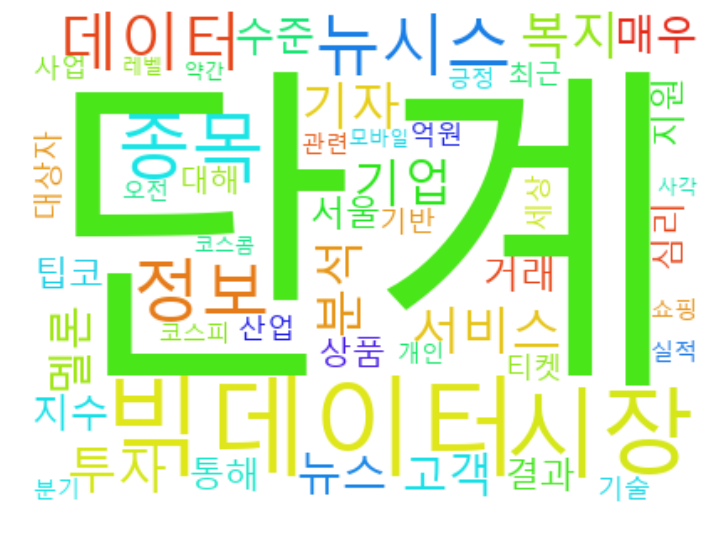

In [53]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

# 단어간 상관계수

In [54]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0) # 상관계수 구하기(rowvar =0 : 컬럼단위 상관계수, 1이면 문서간의 상관계수)

In [55]:
word_corr

array([[ 1.        ,  0.05723556, -0.09573652, ..., -0.03881715,
         0.48229413, -0.12123059],
       [ 0.05723556,  1.        ,  0.42394952, ...,  0.46340331,
        -0.11599038, -0.11306148],
       [-0.09573652,  0.42394952,  1.        , ...,  0.54754018,
        -0.16762904, -0.16339619],
       ..., 
       [-0.03881715,  0.46340331,  0.54754018, ...,  1.        ,
        -0.09554752, -0.18254425],
       [ 0.48229413, -0.11599038, -0.16762904, ..., -0.09554752,
         1.        , -0.04911176],
       [-0.12123059, -0.11306148, -0.16339619, ..., -0.18254425,
        -0.04911176,  1.        ]])

# 상관관계 높은 것 100개만 추리기

In [65]:
edges = []
for i in range(len(words)): 
    for j in range(i + 1, len(words)): 
        edges.append((words[i], words[j], word_corr[i, j])) # 1이 아닌 및부분의 상관계수 추리기

In [66]:
edges = sorted(edges, key=operator.itemgetter(2), reverse=True) # 상관게수가 높은걸로 정렬

In [67]:
edges = edges[:50]

In [69]:
edges

[('멜론', '티켓', 0.9864327740230191),
 ('뉴시스', '코스콤', 0.97624088887718496),
 ('대상자', '복지', 0.96945996611998375),
 ('복지', '사각', 0.95816586996256348),
 ('뉴시스', '세상', 0.93449324109223242),
 ('지수', '코스콤', 0.93134183543352667),
 ('대상자', '사각', 0.91795845788283403),
 ('단계', '코스콤', 0.91792050534942182),
 ('뉴시스', '지수', 0.91398823602153245),
 ('단계', '코스피', 0.90884524692701829),
 ('레벨', '수준', 0.90688410063819214),
 ('약간', '코스콤', 0.90147164786495404),
 ('세상', '코스콤', 0.88907923617041962),
 ('단계', '매우', 0.88785610848165519),
 ('매우', '코스피', 0.88416894255087808),
 ('단계', '약간', 0.88004173404394836),
 ('심리', '코스콤', 0.87810604024902517),
 ('단계', '레벨', 0.8773295793428959),
 ('단계', '지수', 0.87432797224148362),
 ('뉴시스', '단계', 0.86696070618595056),
 ('레벨', '심리', 0.8639822692353073),
 ('뉴시스', '심리', 0.86333286895628469),
 ('뉴시스', '약간', 0.85051789509935294),
 ('수준', '심리', 0.8472018501244224),
 ('단계', '심리', 0.84512793693931676),
 ('분기', '실적', 0.84342788621740716),
 ('매우', '코스콤', 0.84333207511592112),
 ('세상', '지수', 0

In [68]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

# 상관관계 시각화

In [61]:
import networkx

In [62]:
G = networkx.Graph() # 그래프 생성

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight) # 노드간의 연결선을 추가(단어간의 관계)
    edge_set.add((word1, word2))

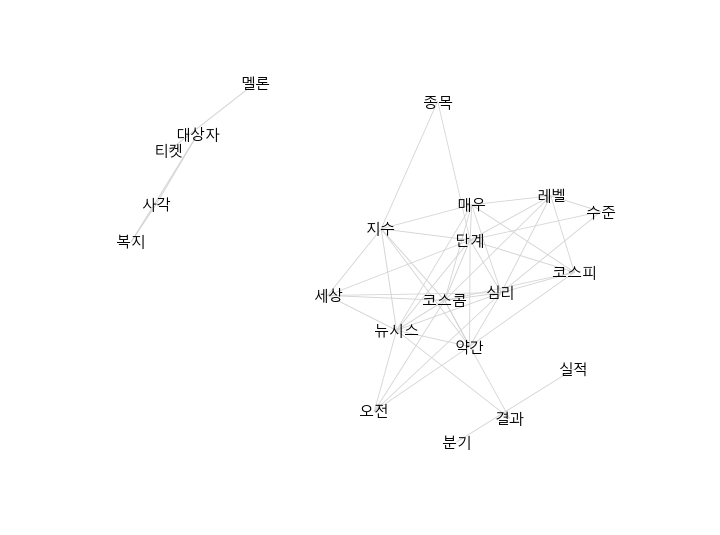

In [64]:
# spring_layout : edge를 스프링처럼 사용하여 단어간의 자성이 있는 것처럼 밀어내거나 당기는 물리학 시뮬레이션으로 위치를 나타냄
# 서로 연결이 잘 되있을수록 가깝게 연결되어 나옴
# 항상 랜덤이다
# iterations 가 커질수록 안정적으로 나온다.
position = networkx.spring_layout(G, iterations=30) 
pyplot.figure(figsize=(12, 9)) # 그래프 크기
networkx.draw_networkx_nodes(G, position, node_size=0) # 노드추가
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray') # edge 추가
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic') # 노드의 단어
pyplot.axis('off')
pyplot.show()